In [3]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import plotly.graph_objs as go
import plotly.offline as py

In [2]:
# matplotlib 한글 출력..
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/malgun.ttf'  # 내가 원하는 폰트로 따로 설정이 가능
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [13]:
# MySQL Connection 연결
conn = pymysql.connect(host='49.247.132.235', user='kbo_db', password='1234', db='kbo_data_db', charset='utf8')
# Connection 으로부터 Cursor 생성
curs = conn.cursor()


df_team_rank = pd.read_excel('team_win.xlsx', index_col=0)

df_2020_hit = pd.read_csv('kbo_hitter_today_20200722.csv', index_col=0)
df_2020_pit = pd.read_csv('kbo_pithcer_today_20200722.csv', index_col=0)
df_2019_hit = pd.read_excel('2010-2019_타자.xlsx', index_col=0)
df_2019_pit = pd.read_excel('2010-2019_투수.xlsx', index_col=0)

df_2020_hit.reset_index(drop=True, inplace=True)
df_2020_pit.reset_index(drop=True, inplace=True)

In [108]:
# MySQL Connection 연결
conn = pymysql.connect(host='49.247.132.235', user='kbo_db', password='1234', db='kbo_data_db', charset='utf8')
# Connection 으로부터 Cursor 생성
curs = conn.cursor()

sql = '''SELECT * from kbo_pitcher_player;'''   
curs.execute(sql)
rows = curs.fetchall()
df_pit_name = pd.DataFrame(rows)

sql = '''SELECT * from kbo_hitter_player;'''   
curs.execute(sql)
rows = curs.fetchall()
df_hit_name = pd.DataFrame(rows)

conn.close()

In [109]:
df_hit_name.columns=['player_id ', 'player_name']

In [110]:
df_2020_hit_m = pd.merge(df_2020_hit, df_hit_name, on = 'player_id ', how = 'left')
df_2020_hit_m = df_2020_hit_m.dropna()
team_year_rank = df_team_rank[df_team_rank[0] == 2020]
df_2020_hit_m['player_team'] = df_2020_hit_m['player_team'].apply(lambda x: team_year_rank[1][x == team_year_rank[2]].values[0])

In [136]:
df_2020_hit_m = df_2020_hit_m.drop(['player_id ', 'player_year '], axis=1)

In [112]:
df_pit_name.columns=['player_id ', 'player_name']

In [113]:
df_2020_pit_m = pd.merge(df_2020_pit, df_pit_name, on = 'player_id ', how = 'left')
df_2020_pit_m = df_2020_pit_m.dropna()
df_2020_pit_m['player_team'] = df_2020_pit_m['player_team'].apply(lambda x: team_year_rank[1][x == team_year_rank[2]].values[0])

In [142]:
df_2020_pit_m = df_2020_pit_m.drop(['player_id ', 'player_year '], axis=1)

In [117]:
df_2020_pit_m = df_2020_pit_m.apply(lambda x: x.replace('-','0')) 

In [119]:
df_2020_pit_m['player_IP'] = df_2020_pit_m['player_IP'].apply(lambda x: x.replace('1/3', '.3') if('1/3' in x) else (x.replace('2/3', '.6') if('2/3' in x) else x))

In [140]:
df_2019_hit.columns = ['player_team', 'player_AVG',
       'player_G', 'player_PA', 'player_AB', 'player_R', 'player_H',
       'player_2B', 'player_3B', 'player_HR', 'player_TB', 'player_RBI',
       'player_SB', 'player_CS', 'player_BB', 'player_HBP', 'player_SO',
       'player_GDP', 'player_SLG', 'player_OBP', 'player_E',
       'player_name', 'mvp']

In [144]:
df_2019_pit.columns = ['player_team', 'player_ERA', 'player_G', 'player_CG', 'player_SHO',
       'player_W', 'player_L', 'player_SV', 'player_HLD', 'player_WPCT',
       'player_TBF', 'player_IP', 'player_H', 'player_HR', 'player_BB',
       'player_HBP', 'player_SO', 'player_R', 'player_ER', 'player_name', 'mvp']

In [149]:
df_2019_hit

,player_team,player_AVG,player_G,player_PA,player_AB,player_R,player_H,player_2B,player_3B,player_HR,...,player_CS,player_BB,player_HBP,player_SO,player_GDP,player_SLG,player_OBP,player_E,player_name,mvp
0,6,0.000,15,15,12,3,0,0,0,0,...,0,3,0,3,1,0.000,0.200,1,백진우,0
1,4,0.156,29,50,45,6,7,1,0,1,...,0,1,2,18,0,0.244,0.208,2,정훈,0
2,5,0.111,24,30,27,3,3,3,0,0,...,0,2,0,8,0,0.222,0.172,0,홍재호,0
3,5,0.172,47,93,87,8,15,5,1,2,...,0,6,0,31,0,0.322,0.226,0,이종환,0
4,8,0.167,34,71,60,6,10,0,0,0,...,1,7,2,11,1,0.167,0.275,1,이상훈,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2,0.286,21,15,14,5,4,0,1,0,...,0,1,0,5,1,0.429,0.333,1,양종민,0
246,5,0.342,130,549,494,88,169,38,1,23,...,1,36,10,57,13,0.563,0.392,8,안치홍,0
247,3,0.259,58,102,85,15,22,5,0,4,...,0,11,3,26,3,0.459,0.364,0,김회성,0
248,5,0.295,88,205,183,22,54,11,0,4,...,1,16,5,49,5,0.421,0.366,6,정성훈,0


,player_name,per
1,페르난데스,0.01
127,이성우,0.01
145,한동민,0.01
14,알테어,0.01
160,황윤호,0.00


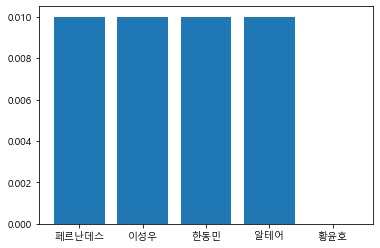

In [163]:
# 2020년 타자 예측

y = df_2019_hit['mvp']
x = df_2019_hit.drop(['player_name', 'mvp'], axis=1)
x1 = df_2020_hit_m.drop(['player_name'], axis=1)

trr = RandomForestClassifier().fit(x, y)
preds = trr.predict_proba(x1)
list1 = preds[:,1]

df_2020_hit_c = df_2020_hit_m.copy()
df_2020_hit_c['per'] = list1
df_2020_hit_c2 = df_2020_hit_c[['player_name','per']].sort_values('per', ascending=False)[:5]#.plot(kind='bar')
plt.bar(df_2020_hit_c2['player_name'], df_2020_hit_c2['per'], data = df_2020_hit_c2)
df_2020_hit_c2

In [ ]:
trr = RandomForestClassifier().fit(x, y)
features = x.columns.values

In [ ]:
# From https://www.kaggle.com/arthurtok/interactive-porto-insights-a-plot-ly-tutorial
# Scatter plot 
trace = go.Scatter(
    y = trr.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = trr.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [ ]:
x, y = (list(x) for x in zip(*sorted(zip(trr.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 500,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')